In [ ]:
from langchain_community.tools import ArxivQueryRun,WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper,ArxivAPIWrapper

In [ ]:
api_wrapper_arxiv=ArxivAPIWrapper(top_k_results=2,doc_content_chars_max=500)
arxiv=ArxivQueryRun(api_wrapper=api_wrapper_arxiv)

In [ ]:
api_wrapper_wiki=WikipediaAPIWrapper(top_k_results=1,doc_content_chars_max=500)
wiki=WikipediaQueryRun(api_wrapper=api_wrapper_wiki)

In [ ]:
from dotenv import load_dotenv
load_dotenv()

import os

os.environ["TAVILY_API_KEY"]=os.getenv("TAVILY_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [ ]:
from langchain_community.tools.tavily_search import TavilySearchResults

tavily = TavilySearchResults()

C:\Users\chris\AppData\Local\Temp\ipykernel_42060\735679136.py:3: LangChainDeprecationWarning: The class `TavilySearchResults` was deprecated in LangChain 0.3.25 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-tavily package and should be used instead. To use it run `pip install -U :class:`~langchain-tavily` and import as `from :class:`~langchain_tavily import TavilySearch``.
  tavily = TavilySearchResults()


In [ ]:
def add(a,b):
    """
    args: two integers as input
    returns: sum
    """
    return a+b

def multiply(a,b):
    """
    args: two integers as input
    returns: product
    """
    return a*b

In [ ]:
tools=[arxiv,wiki,tavily,add,multiply]

In [ ]:
from langchain_groq import ChatGroq

llm=ChatGroq(model="qwen/qwen3-32b")

llm_with_tools=llm.bind_tools(tools)

In [ ]:
from typing_extensions import TypedDict
from langchain_core.messages import AnyMessage
from typing import Annotated
from langgraph.graph.message import add_messages
class State(TypedDict):
    messages:Annotated[list[AnyMessage],add_messages]

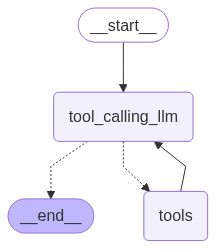

In [ ]:
### Entire Chatbot With LangGraph
from IPython.display import Image, display
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.prebuilt import tools_condition

### Node definition
def tool_calling_llm(state:State):
    return {"messages":[llm_with_tools.invoke(state["messages"])]}

# Build graph
builder = StateGraph(State)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools", ToolNode(tools))

builder.add_edge(START, "tool_calling_llm")
builder.add_conditional_edges(
    "tool_calling_llm",
    # If the latest message (result) from assistant is a tool call -> tools_condition routes to tools
    # If the latest message (result) from assistant is a not a tool call -> tools_condition routes to END
    tools_condition,
)
builder.add_edge("tools", "tool_calling_llm")


graph = builder.compile()

# View
display(Image(graph.get_graph().draw_mermaid_png()))


In [ ]:
messages=graph.invoke({"messages":"1706.03762"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

1706.03762
================================== Ai Message ==================================
Tool Calls:
  arxiv (yyw92ezxh)
 Call ID: yyw92ezxh
  Args:
    query: 1706.03762
================================= Tool Message =================================
Name: arxiv

Published: 2023-08-02
Title: Attention Is All You Need
Authors: Ashish Vaswani, Noam Shazeer, Niki Parmar, Jakob Uszkoreit, Llion Jones, Aidan N. Gomez, Lukasz Kaiser, Illia Polosukhin
Summary: The dominant sequence transduction models are based on complex recurrent or
convolutional neural networks in an encoder-decoder configuration. The best
performing models also connect the encoder and decoder through an attention
mechanism. We propose a new simple network architecture, the Transformer, base
================================== Ai Message ==================================

The arXiv paper [1706.03762](https://arxiv.org/abs/1706.03762) titl

In [ ]:
messages=graph.invoke({"messages":"add 4 6 and then multiply by 2"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

add 4 6 and then multiply by 2
================================== Ai Message ==================================
Tool Calls:
  add (mm15es4zz)
 Call ID: mm15es4zz
  Args:
    a: 4
    b: 6
================================= Tool Message =================================
Name: add

10
================================== Ai Message ==================================
Tool Calls:
  multiply (v97axaedm)
 Call ID: v97axaedm
  Args:
    a: 10
    b: 2
================================= Tool Message =================================
Name: multiply

20
================================== Ai Message ==================================

The result of adding 4 and 6, then multiplying by 2 is **20**.


In [ ]:
messages=graph.invoke({"messages":"what is genAI"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

what is genAI
================================== Ai Message ==================================
Tool Calls:
  wikipedia (g1m5wpets)
 Call ID: g1m5wpets
  Args:
    query: Generative artificial intelligence
================================= Tool Message =================================
Name: wikipedia

Page: Generative artificial intelligence
Summary: Generative artificial intelligence (Generative AI, GenAI, or GAI) is a subfield of artificial intelligence that uses generative models to produce text, images, videos, or other forms of data. These models learn the underlying patterns and structures of their training data and use them to produce new data based on the input, which often comes in the form of natural language prompts.
Generative AI tools have become more common since the AI boom in 
================================== Ai Message ==================================

Generative Artificial Intelligen

In [ ]:
messages=graph.invoke({"messages":"give me the latest AI news from june to august"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

give me the latest AI news from june to august
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (tb4ca5czx)
 Call ID: tb4ca5czx
  Args:
    query: latest AI news from June to August
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "The latest AI news we announced in July", "url": "https://blog.google/technology/ai/google-ai-updates-july-2025/", "content": "# The latest AI news we announced in July\n\nHere’s a recap of some of our biggest AI updates from July, including AI Mode tailored for back-to-school, new creative tools to transform your old Google Photos and a new AI model from Google DeepMind to help historians.\n\nSuperG\n\n## General summary [...] In July, Google expanded access to its AI tools and made them more user-friendly. New features include A

In [ ]:
messages=graph.invoke({"messages":"tell me about the recent deepseek model and who developed it"})
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

tell me about the recent deepseek model and who developed it
================================== Ai Message ==================================
Tool Calls:
  tavily_search_results_json (f66zka4a3)
 Call ID: f66zka4a3
  Args:
    query: recent DeepSeek model and who developed it
================================= Tool Message =================================
Name: tavily_search_results_json

[{"title": "DeepSeek Coder", "url": "https://deepseekcoder.github.io/", "content": "DeepSeek Coder comprises a series of code language models trained from scratch on both 87% code and 13% natural language in English and Chinese.", "score": 0.98535}, {"title": "Change Log - DeepSeek API Docs", "url": "https://api-docs.deepseek.com/updates", "content": "The DeepSeek V2 Chat and DeepSeek Coder V2 models have been merged and upgraded into the new model, DeepSeek V2.5. For backward compatibility, API users can", "score": 0.98

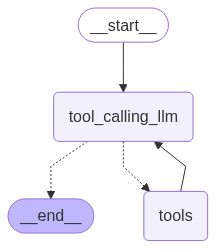

In [ ]:
from langgraph.checkpoint.memory import MemorySaver
memory=MemorySaver()
graph_memory = builder.compile(checkpointer=memory)

# View
display(Image(graph_memory.get_graph().draw_mermaid_png()))

In [ ]:
from langchain_core.messages import HumanMessage

## Specify the thread

config={"configurable":{"thread_id":"1"}}
# Specify an input
messages = [HumanMessage(content="Add 12 and 13.")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (vtgkxwc4k)
 Call ID: vtgkxwc4k
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 12 and 13 is **25**.


In [ ]:

messages = [HumanMessage(content="add that number to 25")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (vtgkxwc4k)
 Call ID: vtgkxwc4k
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 12 and 13 is **25**.
================================ Human Message =================================

add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (xbgdexhmx)
 Call ID: xbgdexhmx
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

The result of adding 25 and 25 is **50**.

$$
\boxed{50}
$$


In [ ]:
messages = [HumanMessage(content="then multiplty that number by 2")]
messages=graph_memory.invoke({"messages":messages},config=config)
for m in messages['messages']:
    m.pretty_print()

================================ Human Message =================================

Add 12 and 13.
================================== Ai Message ==================================
Tool Calls:
  add (vtgkxwc4k)
 Call ID: vtgkxwc4k
  Args:
    a: 12
    b: 13
================================= Tool Message =================================
Name: add

25
================================== Ai Message ==================================

The sum of 12 and 13 is **25**.
================================ Human Message =================================

add that number to 25
================================== Ai Message ==================================
Tool Calls:
  add (xbgdexhmx)
 Call ID: xbgdexhmx
  Args:
    a: 25
    b: 25
================================= Tool Message =================================
Name: add

50
================================== Ai Message ==================================

The result of adding 25 and 25 is **50**.

$$
\boxed{50}
$$
================================ Hu